<a href="https://colab.research.google.com/github/Srinivas26k/RealTime-AI-Projects/blob/main/Real_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
! pip install yfinance

In [119]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [120]:
ticker = "NVDA"
data = yf.download(ticker, start="2024-11-01", end="2025-01-30", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [121]:
data.to_csv(f"{ticker}_stock_data.csv")
print(f"data saved as {ticker}_stock_data.csv")

data saved as NVDA_stock_data.csv


In [122]:
print(data.head())

Price            Close        High         Low        Open     Volume
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA
Date                                                                 
2024-11-01  135.390671  137.300543  134.560741  134.690722  207127800
2024-11-04  136.040634  138.950437  135.560671  137.200558  187528200
2024-11-05  139.900360  140.360320  137.320536  137.440523  160537400
2024-11-06  145.599960  146.479905  141.950218  142.950149  242043900
2024-11-07  148.869751  148.919735  146.159931  146.379917  207323300


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2024-11-01 to 2025-01-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   59 non-null     float64
 1   (High, NVDA)    59 non-null     float64
 2   (Low, NVDA)     59 non-null     float64
 3   (Open, NVDA)    59 non-null     float64
 4   (Volume, NVDA)  59 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.8 KB


In [124]:
# Extract 'Close' prices as a time series
close_prices = data['Close'].values
close_prices = close_prices.reshape(-1,1)

In [125]:
print(close_prices)

[[135.39067078]
 [136.04063416]
 [139.90036011]
 [145.59996033]
 [148.86975098]
 [147.61982727]
 [145.24998474]
 [148.2797699 ]
 [146.25991821]
 [146.74987793]
 [141.97021484]
 [140.14033508]
 [146.99986267]
 [145.87994385]
 [146.65989685]
 [141.94021606]
 [136.01063538]
 [136.91056824]
 [135.33067322]
 [138.24047852]
 [138.62045288]
 [140.25033569]
 [145.13000488]
 [145.05999756]
 [142.44000244]
 [138.80999756]
 [135.07000732]
 [139.30999756]
 [137.33999634]
 [134.25      ]
 [132.        ]
 [130.38999939]
 [128.91000366]
 [130.67999268]
 [134.69999695]
 [139.66999817]
 [140.22000122]
 [139.92999268]
 [137.00999451]
 [137.49000549]
 [134.28999329]
 [138.30999756]
 [144.47000122]
 [149.42999268]
 [140.13999939]
 [140.11000061]
 [135.91000366]
 [133.22999573]
 [131.75999451]
 [136.24000549]
 [133.57000732]
 [137.71000671]
 [140.83000183]
 [147.07000732]
 [147.22000122]
 [142.61999512]
 [118.41999817]
 [128.99000549]
 [123.69999695]]


In [126]:
# Normalize the data
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(close_prices)

In [127]:
# Create input features (X) and targets (y)
timesteps = 10
def create_sequences(data, timesteps):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i+timesteps])
        y.append(data[i+timesteps])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_prices, timesteps)
X = X.reshape(X.shape[0], X.shape[1])  # Reshape for MLP

In [128]:
# Train the Model using MLP
model_mlp = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])
model_mlp.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [129]:
# Train the model
model_mlp.fit(X, y, epochs=200, batch_size=32)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.4089
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - loss: 0.3195
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 0.2490
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 0.2113
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.1502 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.1116
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0916 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0602 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0463
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0390
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0333
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.0318
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0394 
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0428
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - loss: 0.0448
Epoch 1

In [130]:
# Fetch the most recent stock prices for real-time prediction
latest_data = yf.download(ticker, period="59d", interval="1h")
latest_data.to_csv(f'{ticker}_latest_data.csv')
print(f"Latest data saved to {ticker}_latest_data.csv")

[*********************100%***********************]  1 of 1 completed

Latest data saved to NVDA_latest_data.csv


In [131]:
recent_prices = latest_data['Close'].values[-timesteps:]
scaled_recent = scaler.transform(recent_prices.reshape(-1, 1)).reshape(1, timesteps)

In [132]:
# Predict the next value
prediction = model_mlp.predict(scaled_recent)
predicted_price = scaler.inverse_transform(prediction.reshape(-1, 1))
print(f"Predicted Next Price: {predicted_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Predicted Next Price: 129.72


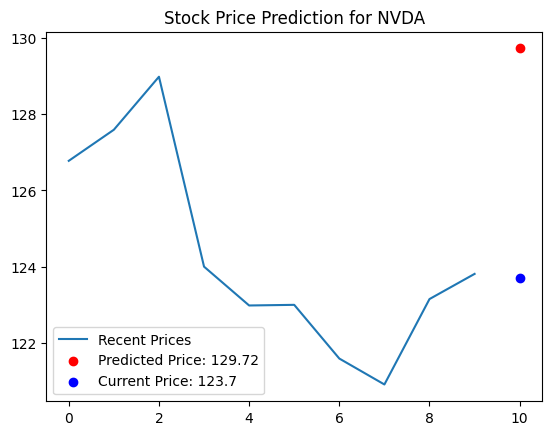

In [133]:
# Visualize the Prediction
plt.plot(range(timesteps), recent_prices, label='Recent Prices')
plt.scatter(timesteps, predicted_price, color='red', label=f'Predicted Price: {predicted_price[0][0]:.2f}')
plt.scatter(timesteps, 123.70, color='blue', label='Current Price: 123.7')
plt.title(f"Stock Price Prediction for {ticker}")
plt.legend()
plt.show()

**Improving the Model**

In [135]:
# Improve the Model using a deeper MLP
model_mlp = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])
model_mlp.compile(optimizer='adam', loss='mse')

In [136]:
model_mlp.fit(X, y, epochs=50, batch_size=16)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3774
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2229 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1116 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0548
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0472
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0579
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0550
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0396
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0354
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0322
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0353
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0393
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0281
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0357
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0339
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━

In [137]:
recent_prices = latest_data['Close'].values[-timesteps:]
scaled_recent = scaler.transform(recent_prices.reshape(-1, 1)).reshape(1, timesteps)


In [138]:
prediction = model_mlp.predict(scaled_recent)
predicted_price = scaler.inverse_transform(prediction.reshape(-1, 1))
print(f"Predicted Next Price: {predicted_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predicted Next Price: 127.15


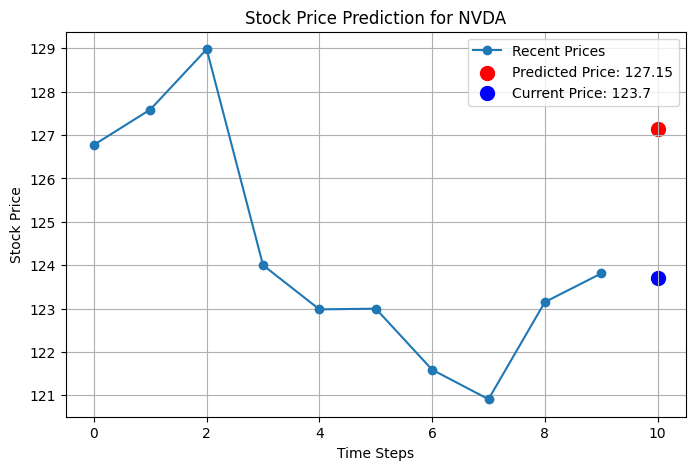

In [139]:
plt.figure(figsize=(8,5))
plt.plot(range(timesteps), recent_prices, label='Recent Prices', linestyle='-', marker='o')
plt.scatter(timesteps, predicted_price, color='red', label=f'Predicted Price: {predicted_price[0][0]:.2f}', s=100)
plt.scatter(timesteps, 123.70, color='blue', label='Current Price: 123.7', s=100)
plt.title(f"Stock Price Prediction for {ticker}")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()